# Sprint 機械学習スクラッチ 決定木

参考サイト：<br>
https://qiita.com/roki18d/items/1c5633beb80a5c2d58e7<br>
https://hktech.hatenablog.com/entry/2018/10/05/004235<br>

In [1]:
import numpy as np
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        # 閾値以上の値のデータを保管
        self.y_left = 0
        # 閾値未満の値のデータを保管
        self.y_right = 0
        self.combined_data = None
        # 閾値を記憶
        self.threshold = 0
        # 情報利得が最大になる閾値を保存
        self.best_threshold = 0
        # 情報利得が最大になる閾値の保存
        self.parents_node_gini = 0
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        pass
        return

【問題1】不純度を求める関数

In [ ]:
def _gini_function(self, y):
    self.classes = np.unique(y)
    gini = 1.0
    for c in self.classes:
        gini -= (len(y[y==c] / len(y)))**2
    self.parents_node_gini = gini

【問題2】情報利得を求める関数

In [ ]:
# parents_node_value: 最初にジニ不純度を求めた時の値
def _information_gain(self, y_left, y_right, parents_node_value):
    p_left = float(len(y_left) / (len(y_left) + len(y_right)))
    p_right = float(len(y_right) / (len(y_left) + len(y_right)))
    return parents_node_value - ((p_left * self._gini_function(y_left[:, 1])) + (p_right * self._gini_function(y_right[:, 1])))

【問題3】学習

In [ ]:
# こいつらをfitでfor文回す
# データを左右に割り振る関数
def _left_or_right(self):
#     self.combined_data = np.concatenate([X, y], axis=1)
    self.y_left = self.combined_data[self.combined_data[:, 0] >= self.threshold]
    self.y_right = self.combined_data[self.combined_data[:, 0] < self.threshold]
    
# ある閾値における情報利得値を取得する関数
def _all_gain(self):
    self.all_gain = []
    self.all_gain.append(self._information_gain(self.y_left, y_right, self.parents_node_gini))
    

【問題4】推定

In [ ]:
def predict(self, X):
    """
    決定木分類器を使いラベルを推定する
    """
    pred = np.where(X[:, 0] >= self.best_threshold, self.classes[0], self.classes[1])
    return pred

【問題5】学習と推定

In [84]:
import numpy as np
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        # 閾値以上の値のデータを保管
        self.y_left = 0
        # 閾値未満の値のデータを保管
        self.y_right = 0
        self.combined_data = None
        # 閾値を記憶
        self.threshold = 0
        # 情報利得が最大になる閾値を保存
        self.best_threshold = 0
        # 情報利得が最大になる閾値の保存
        self.parents_node_gini = 0
        # 情報利得を保存するリスト
        self.all_gain = []
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        y = y.reshape(-1, 1)
        self.combined_data = np.concatenate([X, y], axis=1)
        self.parents_node_gini = self._gini_function(y)
        for i in range(len(self.combined_data)):
            self.threshold = self.combined_data[i, 0]
            self._left_or_right()
            self._all_gain()
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | information gain value: {2}'.format(i+1, len(self.combined_data), self.all_gain[-1]))
        
        self.best_threshold = self._find_max()
        
            
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        pred = np.where(X[:, 0] >= self.best_threshold, self.classes[1], self.classes[0])
        return pred
    
    def _gini_function(self, y):
        self.classes = np.unique(y)
        gini = 1.0
        for c in self.classes:
            gini -= (len(y[y==c]) / len(y))**2
    
        return gini
    
    # parents_node_value: 最初にジニ不純度を求めた時の値
    def _information_gain(self, y_left, y_right, parents_node_value):
        p_left = float(len(y_left) / (len(y_left) + len(y_right)))
        p_right = float(len(y_right) / (len(y_left) + len(y_right)))
        return parents_node_value - ((p_left * self._gini_function(y_left[:, 2]))\
                                     + (p_right * self._gini_function(y_right[:, 2])))
    
    # こいつらをfitでfor文回す
    # データを左右に割り振る関数
    def _left_or_right(self):
    #     self.combined_data = np.concatenate([X, y], axis=1)
        self.y_left = self.combined_data[self.combined_data[:, 0] >= self.threshold]
        self.y_right = self.combined_data[self.combined_data[:, 0] < self.threshold]
    
    # ある閾値における情報利得値を取得する関数
    def _all_gain(self):
        self.all_gain.append(self._information_gain(self.y_left, self.y_right, self.parents_node_gini))
    # 最大の情報利得のインデックスを見つけてきてその時のvalueを閾値にして返す関数
    def _find_max(self):
        self.all_gain = np.array(self.all_gain)
        max_gains_index = np.argmax(self.all_gain)
        best_threshold = self.combined_data[max_gains_index, 0]
        return best_threshold

In [85]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
iris_data = iris.data[:100, :2]
iris_target = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
SS = StandardScaler()
norm_X_train = SS.fit_transform(X_train)
norm_X_test = SS.transform(X_test)

In [91]:
mydt = ScratchDecesionTreeClassifierDepth1(verbose=True)
mydt.fit(X_train, y_train)
pred = mydt.predict(X_test)
print(pred)

1 / 80 times done | information gain value: 0.08666666666666667
2 / 80 times done | information gain value: 0.15573770491803274
3 / 80 times done | information gain value: 0.019480519480519376
4 / 80 times done | information gain value: 0.125
5 / 80 times done | information gain value: 0.047945205479452024
6 / 80 times done | information gain value: 0.23142857142857148
7 / 80 times done | information gain value: 0.019480519480519376
8 / 80 times done | information gain value: 0.17883705206220424
9 / 80 times done | information gain value: 0.18005952380952384
10 / 80 times done | information gain value: 0.01948051948051943
11 / 80 times done | information gain value: 0.08666666666666667
12 / 80 times done | information gain value: 0.3005003126954347
13 / 80 times done | information gain value: 0.3005003126954347
14 / 80 times done | information gain value: 0.09701492537313422
15 / 80 times done | information gain value: 0.05555555555555558
16 / 80 times done | information gain value: 0.

In [92]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 90.0%
適合率: 90.0%
再現率: 90.0%
F値: 0.9


In [93]:
mydt.best_threshold

5.5

【問題6】決定領域の可視化

In [94]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

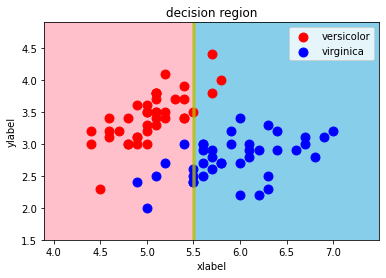

In [95]:
decision_region(X_train, y_train, mydt)

【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成

【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成